In [1]:
# !pip install xgboost -q

In [2]:
# !pip install graphviz -q

In [17]:
!pip install category_encoders -q

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [2]:
data = pd.read_csv('../data/clinical_training_data.csv')
data.head()

,DX.bl,AGE,PTGENDER,PTEDUCAT,PTETHCAT,PTRACCAT,APOE4,MMSE,AD_dx_in_5_yrs
0,LMCI,67.5,Male,10,Hisp/Latino,White,0,27,0
1,CN,73.7,Male,16,Not Hisp/Latino,White,0,29,0
2,LMCI,80.4,Female,13,Not Hisp/Latino,White,0,25,0
3,CN,78.5,Female,12,Hisp/Latino,White,0,29,0
4,CN,80.8,Male,18,Not Hisp/Latino,White,1,29,0


In [25]:
458/len(data)

0.9252525252525252

In [24]:
len(data[data['AGE'] >= 65])

458

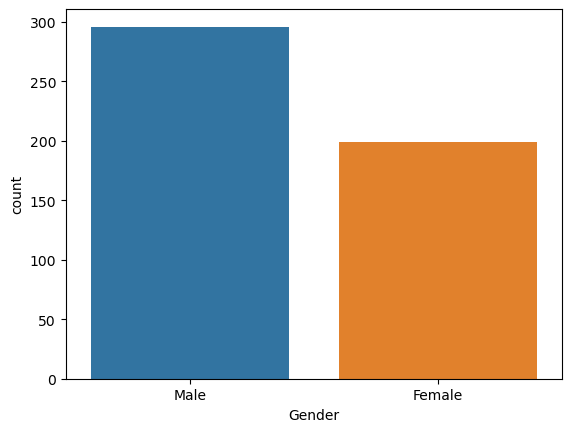

In [8]:
sns.countplot(data=data, x="PTGENDER", order=['Male', 'Female'])
plt.xlabel('Gender')
plt.show()

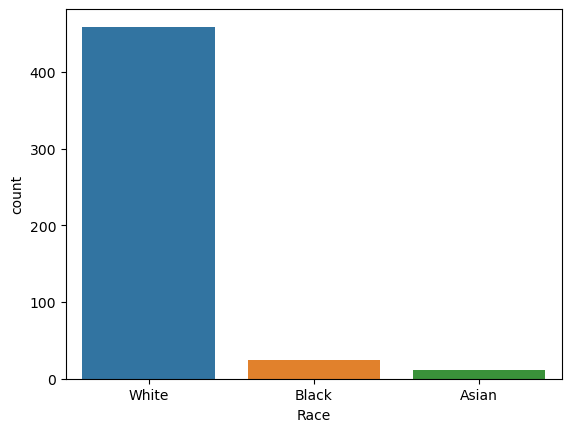

In [13]:
sns.countplot(data=data, x="PTRACCAT")
plt.xlabel('Race')
plt.show()

<AxesSubplot: xlabel='AGE', ylabel='Count'>

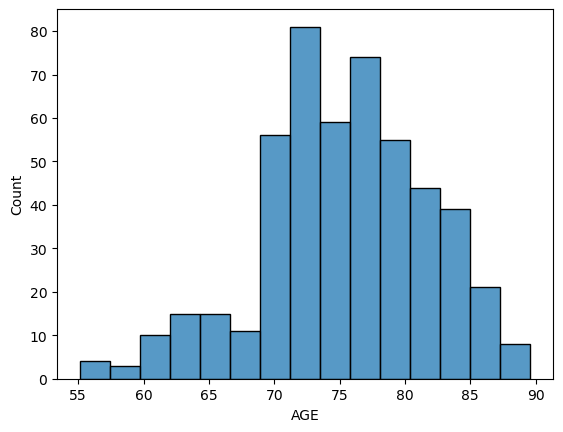

In [10]:
sns.histplot(data=data, x="AGE", bins=15)

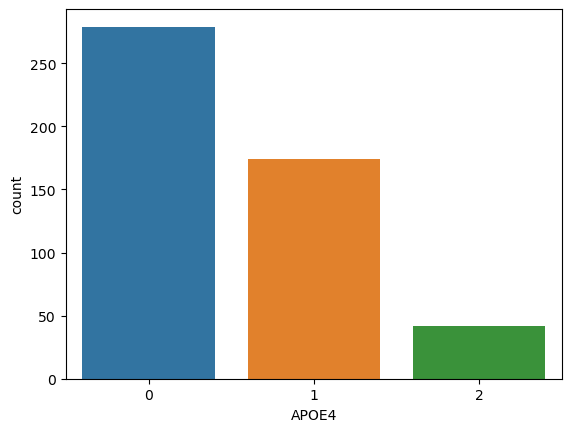

In [16]:
sns.countplot(data=data, x="APOE4")
plt.show()

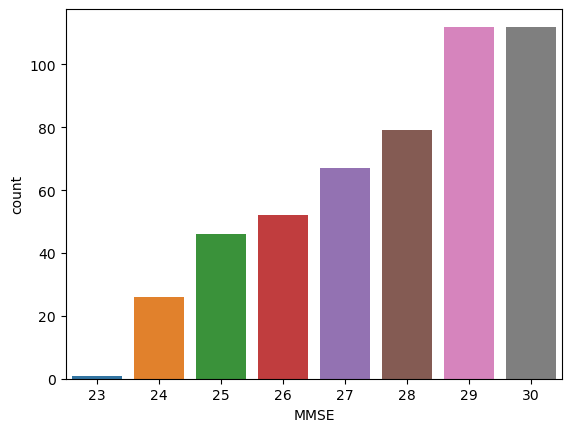

In [17]:
sns.countplot(data=data, x="MMSE")
plt.show()

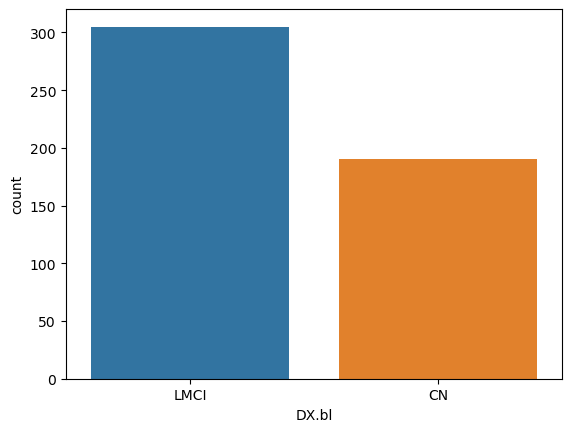

In [18]:
sns.countplot(data=data, x="DX.bl")
plt.show()

In [15]:
X = data.drop(columns=['AD_dx_in_5_yrs'])
y = data['AD_dx_in_5_yrs']

In [16]:
X["DX.bl"] = X["DX.bl"].astype("category")
X["PTGENDER"] = X["PTGENDER"].astype("category")
X["PTETHCAT"] = X["PTETHCAT"].astype("category")
X["PTRACCAT"] = X["PTRACCAT"].astype("category")

In [17]:
# split test, train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
# create model instance
model = xgb.XGBClassifier(tree_method="hist", enable_categorical=True, device="cuda")
# fit model
model.fit(X_train, y_train)
# make predictions
y_pred = model.predict(X_test)

# evaluate predictions
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.74      0.76        66
           1       0.53      0.58      0.55        33

    accuracy                           0.69        99
   macro avg       0.65      0.66      0.66        99
weighted avg       0.69      0.69      0.69        99



In [28]:
features = X.columns.to_list()
importance = list(model.feature_importances_)

In [31]:
feature_importance = dict(zip(features, importance))
feature_importance_df = pd.DataFrame.from_dict(feature_importance, orient='index').reset_index()
feature_importance_df.columns = ['Feature', 'Importance']
feature_importance_df.sort_values('Importance', ascending=False)

,Feature,Importance
0,DX.bl,0.721209
6,APOE4,0.060033
7,MMSE,0.058399
1,AGE,0.036757
2,PTGENDER,0.034487
3,PTEDUCAT,0.032423
4,PTETHCAT,0.028618
5,PTRACCAT,0.028074


## Remove DX.bl

In [32]:
X = data.drop(columns=['DX.bl','AD_dx_in_5_yrs'])
y = data['AD_dx_in_5_yrs']

In [33]:
X["PTGENDER"] = X["PTGENDER"].astype("category")
X["PTETHCAT"] = X["PTETHCAT"].astype("category")
X["PTRACCAT"] = X["PTRACCAT"].astype("category")

In [34]:
# split test, train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
# create model instance
model = xgb.XGBClassifier(tree_method="hist", enable_categorical=True, device="cuda")
# fit model
model.fit(X_train, y_train)
# make predictions
y_pred = model.predict(X_test)

# evaluate predictions
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79        72
           1       0.42      0.37      0.39        27

    accuracy                           0.69        99
   macro avg       0.59      0.59      0.59        99
weighted avg       0.68      0.69      0.68        99



In [35]:
features = X.columns.to_list()
importance = list(model.feature_importances_)

In [36]:
feature_importance = dict(zip(features, importance))
feature_importance_df = pd.DataFrame.from_dict(feature_importance, orient='index').reset_index()
feature_importance_df.columns = ['Feature', 'Importance']
feature_importance_df.sort_values('Importance', ascending=False)

,Feature,Importance
6,MMSE,0.304788
5,APOE4,0.214837
4,PTRACCAT,0.115015
0,AGE,0.105785
2,PTEDUCAT,0.104718
1,PTGENDER,0.101483
3,PTETHCAT,0.053373


## With MedHist

In [26]:
data_mh = pd.read_csv('../data/clinical_training_data_with_medhist.csv')
data_mh.head()

,Diagnosis_at_Baseline,Age,Gender,Years_of_Education,Ethnicity,Race,APOE4,MMSE,Medical_History_of_Psychiatric_Issues,Medical_History_of_Neurological_Issues,...,Medical_History_of_Gastrointestinal_Issues,Medical_History_of_Hematopoietic_Lymphatic_Issues,Medical_History_of_Renal_Genitourinary_Issues,Medical_History_of_Allergies_Drug_Sensitivities,Medical_History_of_Alcohol_Abuse,Medical_History_of_Drug_Abuse,Medical_History_of_Smoking,Medical_History_of_Malignancy,Medical_History_of_Surgery,AD_dx_in_5_yrs
0,LMCI,67.5,Male,10,Hisp/Latino,White,0,27,0,0,...,0,0,1,0,0,0,1,0,1,0
1,CN,73.7,Male,16,Not Hisp/Latino,White,0,29,0,0,...,1,0,1,0,0,0,1,0,1,0
2,LMCI,80.4,Female,13,Not Hisp/Latino,White,0,25,0,0,...,1,0,0,1,0,0,0,0,1,0
3,CN,78.5,Female,12,Hisp/Latino,White,0,29,1,0,...,0,0,0,0,0,0,0,0,1,0
4,CN,80.8,Male,18,Not Hisp/Latino,White,1,29,0,0,...,1,0,1,1,0,0,0,1,1,0


In [27]:
X = data_mh.drop(columns=['AD_dx_in_5_yrs'])
y = data_mh['AD_dx_in_5_yrs']

In [28]:
X["Diagnosis_at_Baseline"] = X["Diagnosis_at_Baseline"].astype("category")
X["Gender"] = X["Gender"].astype("category")
X["Ethnicity"] = X["Ethnicity"].astype("category")
X["Race"] = X["Race"].astype("category")

In [29]:
# split test, train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
# create model instance
model = xgb.XGBClassifier(tree_method="hist", enable_categorical=True, device="cuda")
# fit model
model.fit(X_train, y_train)
# make predictions
y_pred = model.predict(X_test)

# evaluate predictions
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.81      0.76        63
           1       0.56      0.42      0.48        36

    accuracy                           0.67        99
   macro avg       0.63      0.61      0.62        99
weighted avg       0.65      0.67      0.65        99



In [30]:
features = X.columns.to_list()
importance = list(model.feature_importances_)

In [31]:
feature_importance = dict(zip(features, importance))
feature_importance_df = pd.DataFrame.from_dict(feature_importance, orient='index').reset_index()
feature_importance_df.columns = ['Feature', 'Importance']
feature_importance_df.sort_values('Importance', ascending=False)

,Feature,Importance
0,Diagnosis_at_Baseline,0.433705
5,Race,0.104962
24,Medical_History_of_Malignancy,0.041927
6,APOE4,0.034380
17,Medical_History_of_Gastrointestinal_Issues,0.032796
7,MMSE,0.032764
9,Medical_History_of_Neurological_Issues,0.028920
18,Medical_History_of_Hematopoietic_Lymphatic_Issues,0.024334
2,Gender,0.024277
16,Medical_History_of_Endocrine_Metabolic_Issues,0.023983


## With MedHist + FamHist

In [40]:
data_mh_fh = pd.read_csv('../data/clinical_training_data_with_medhist_famhist.csv')
data_mh_fh.head()

,Diagnosis_at_Baseline,Age,Gender,Years_of_Education,Ethnicity,Race,APOE4,MMSE,Medical_History_of_Psychiatric_Issues,Medical_History_of_Neurological_Issues,...,Medical_History_of_Renal_Genitourinary_Issues,Medical_History_of_Allergies_Drug_Sensitivities,Medical_History_of_Alcohol_Abuse,Medical_History_of_Drug_Abuse,Medical_History_of_Smoking,Medical_History_of_Malignancy,Medical_History_of_Surgery,Family_History_of_Dementia,Family_History_of_AD,AD_dx_in_5_yrs
0,LMCI,67.5,Male,10,Hisp/Latino,White,0,27,0,0,...,1,0,0,0,1,0,1,0.0,0.0,0
1,CN,73.7,Male,16,Not Hisp/Latino,White,0,29,0,0,...,1,0,0,0,1,0,1,1.0,0.0,0
2,LMCI,80.4,Female,13,Not Hisp/Latino,White,0,25,0,0,...,0,1,0,0,0,0,1,1.0,0.0,0
3,CN,78.5,Female,12,Hisp/Latino,White,0,29,1,0,...,0,0,0,0,0,0,1,0.0,0.0,0
4,CN,80.8,Male,18,Not Hisp/Latino,White,1,29,0,0,...,1,1,0,0,0,1,1,1.0,NaN,0


In [41]:
len(data_mh_fh)

494

In [42]:
X = data_mh_fh.drop(columns=['AD_dx_in_5_yrs'])
y = data_mh_fh['AD_dx_in_5_yrs']

In [43]:
X["Diagnosis_at_Baseline"] = X["Diagnosis_at_Baseline"].astype("category")
X["Gender"] = X["Gender"].astype("category")
X["Ethnicity"] = X["Ethnicity"].astype("category")
X["Race"] = X["Race"].astype("category")

In [44]:
# split test, train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
# create model instance
model = xgb.XGBClassifier(tree_method="hist", enable_categorical=True, device="cuda")
# fit model
model.fit(X_train, y_train)
# make predictions
y_pred = model.predict(X_test)

# evaluate predictions
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.88      0.78        58
           1       0.73      0.46      0.57        41

    accuracy                           0.71        99
   macro avg       0.71      0.67      0.67        99
weighted avg       0.71      0.71      0.69        99



In [45]:
features = X.columns.to_list()
importance = list(model.feature_importances_)

In [46]:
feature_importance = dict(zip(features, importance))
feature_importance_df = pd.DataFrame.from_dict(feature_importance, orient='index').reset_index()
feature_importance_df.columns = ['Feature', 'Importance']
feature_importance_df.sort_values('Importance', ascending=False)

,Feature,Importance
0,Diagnosis_at_Baseline,0.460062
5,Race,0.046833
14,Medical_History_of_Dermatologic_Connective_Tis...,0.044608
6,APOE4,0.038223
7,MMSE,0.031129
25,Medical_History_of_Surgery,0.029944
18,Medical_History_of_Hematopoietic_Lymphatic_Issues,0.029580
9,Medical_History_of_Neurological_Issues,0.029145
24,Medical_History_of_Malignancy,0.026967
3,Years_of_Education,0.024921
